In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') 
%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Data Visualization and Preprossessing


In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')
#print df.head(10)
print df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


In [3]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.rename(columns = {'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap',
                         'No-show': 'NoShow',
                         'PatientId': 'PatientID'}, inplace = True)

print ("Basic statistical description of Training sets:")
df.describe()

Basic statistical description of Training sets:


,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df['PatientID'] = df['PatientID'].astype(int) 

In [6]:
print df.PatientID.nunique()

62299


In [7]:
# View range of variables / unique values
print('Age:\t%s'%sorted(df.Age.unique()))
print()
print('Gender:\t%s' %df.Gender.unique())
print()
print('Number of neighbourhoods:\t%s' %df.Neighbourhood.nunique())
print('Neighbourhood:\t%s' %sorted(df.Neighbourhood.unique()))
print()
print('Scholarship:\t%s' %df.Scholarship.unique())
print('Hypertension:\t%s' %df.Hypertension.unique())
print('Diabetes:\t%s' %df.Diabetes.unique())
print('Alcoholism:\t%s' %df.Alcoholism.unique())
print('Handicap:\t%s' %df.Handicap.unique())
print('SMS_received:\t%s' %df.SMS_received.unique())
print('NoShow:\t%s' %df.NoShow.unique())


Age:	[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
()
Gender:	['F' 'M']
()
Number of neighbourhoods:	81
Neighbourhood:	['AEROPORTO', 'ANDORINHAS', 'ANT\xc3\x94NIO HON\xc3\x93RIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATO\xc3\x8dRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLA\xc3\x87\xc3\x83O', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SU\xc3\x81', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE S\xc3\x83O JO\xc3\x83O', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VIT\xc3\x93RIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MA

In [8]:
df.NoShow.value_counts()


No     88208
Yes    22319
Name: NoShow, dtype: int64

The target is unbalanced distributed. About 1/4 appointment is Not Showing.

In [9]:
print ('Total patient # %s' %df.PatientID.nunique())


Total patient # 62299


In [10]:
df.isnull().sum()

PatientID         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
NoShow            0
dtype: int64

There is no NAN value for all the column/row

Now deal with the Age outliers. We exclude the record with Age < 0

In [11]:
df[df['Age']<0].count()

PatientID         1
AppointmentID     1
Gender            1
ScheduledDay      1
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hypertension      1
Diabetes          1
Alcoholism        1
Handicap          1
SMS_received      1
NoShow            1
dtype: int64

In [12]:
df = df[df['Age']>=0] 

### Data Visualization

#### Awaiting Time

In [13]:

# Sort by date
df.sort_values(["AppointmentDay","ScheduledDay"], inplace=True, ascending=True)  

# Convert dates

df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)

# New feature Time = number of days between ScheduledDay and AppointmentDay
df['Time'] = df['ScheduledDay'].sub(df['AppointmentDay'], axis = 0)
df['Time'] = df['Time'] / np.timedelta64(1, 'D')
df['Time'] = df['Time'].abs().apply(np.floor)

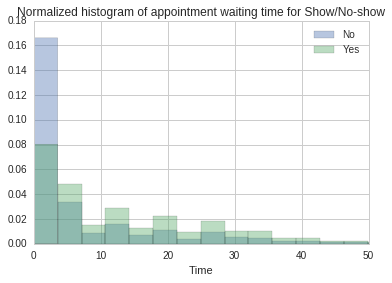

In [14]:
tmp  = df.groupby(['NoShow'])
for name, group in tmp:
    #print name
    #print group.info()
    sns.distplot(group['Time'], kde=False, norm_hist = True, label= str(name)) 
    plt.xlim(0,50)
                 
plt.legend()
plt.title("Normalized histogram of appointment waiting time for Show/No-show")

Clearly, Awaiting time is strongly correlated to NoShow rate. The shorter waiting time shows a higer showing up rate. 


#### Day of week

In [15]:
df['weekday'] = df['AppointmentDay'].dt.dayofweek
df['month'] = pd.DatetimeIndex(df['AppointmentDay']).month


In [16]:
print df['month'].unique()
print df['weekday'].unique()

[4 5 6]
[4 0 1 2 3 5]


In [17]:
def probStatus(dataset, group_by):
    df1 = pd.crosstab(index = dataset[group_by], columns = dataset['NoShow']).reset_index()
    df1['probShowUp'] = df1['No'] / (df1['No'] + df1['Yes'])
    return df1[[group_by, 'probShowUp']]

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


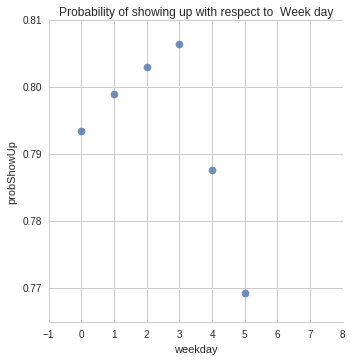

In [18]:
sns.lmplot(data = probStatus(df, 'weekday'), x = 'weekday', y = 'probShowUp', fit_reg = False, scatter_kws={'s':60})
sns.plt.xlim(-1, 8)
sns.plt.title('Probability of showing up with respect to  Week day')
sns.plt.show()

In [19]:
def probStatus1(dataset, group_by1, group_by2):
    df1 = pd.crosstab(index = [dataset[group_by1],dataset[group_by2]], columns = dataset['NoShow']).reset_index()
    df1['probShowUp'] = df1['No'] / (df1['No'] + df1['Yes'])
    return df1


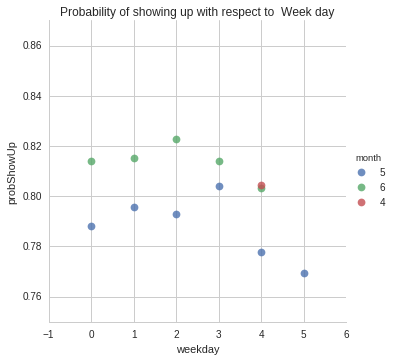

In [20]:
sns.lmplot(data = probStatus1(df, 'weekday','month'), x = 'weekday', 
           y = 'probShowUp', hue='month', fit_reg = False, scatter_kws={'s':60})

sns.plt.xlim(-1, 6)
sns.plt.ylim(0.75, 0.87)
sns.plt.title('Probability of showing up with respect to  Week day')
sns.plt.show()

Seems 'month' also contributes to the prediction

#### Age and Gender

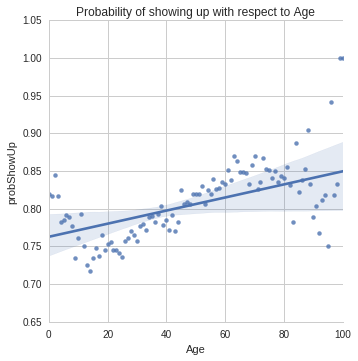

In [21]:
sns.lmplot(data = probStatus(df, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
sns.plt.xlim(0, 100)
sns.plt.ylim(0.65, 1.05)
sns.plt.title('Probability of showing up with respect to Age')
sns.plt.show()


Age obviously is a good predictor

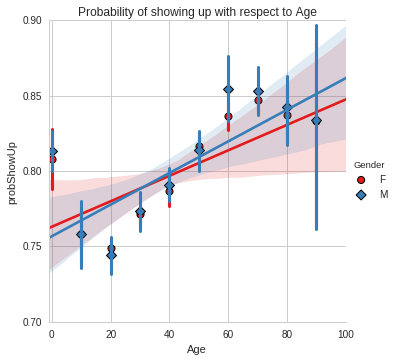

In [22]:
sns.lmplot(data = probStatus1(df, 'Age','Gender'), x = 'Age', 
           y = 'probShowUp', hue='Gender', x_bins=range(0,100, 10), palette="Set1",
           fit_reg = True, markers=["o", "D"], scatter_kws={'linewidths':1,'edgecolor':'k'})
sns.plt.xlim(-1, 100)
sns.plt.ylim(0.7,0.9)
sns.plt.title('Probability of showing up with respect to Age')
sns.plt.show()

However, gender is not sensitive factor.

#### Handicap

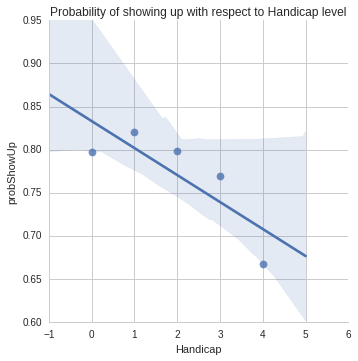

In [23]:
sns.lmplot(data = probStatus(df, 'Handicap'), x = 'Handicap', 
           y = 'probShowUp', palette="Set1", scatter_kws={'s':60},
           fit_reg = True)
sns.plt.xlim(-1, 6)
sns.plt.ylim(0.6, 0.95)
sns.plt.title('Probability of showing up with respect to Handicap level')
sns.plt.show()

#### Neighbourhood dependence

In [24]:
df['Neighbourhood_num'] = df['Neighbourhood'].astype("category").cat.codes


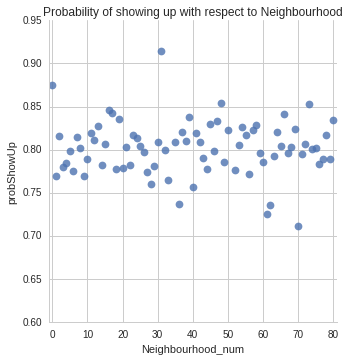

In [25]:
sns.lmplot(data = probStatus(df, 'Neighbourhood_num'), x = 'Neighbourhood_num', 
           y = 'probShowUp', palette="Set1", scatter_kws={'s':60},
           fit_reg = False)
sns.plt.xlim(-1, 81)
sns.plt.ylim(0.6, 0.95)
sns.plt.title('Probability of showing up with respect to Neighbourhood')
sns.plt.show()

#### Check other Categorical variable dependence:
    'Diabetes', 'Alcoholism', 'Hypertension', 'SMS_received',  'Scholarship

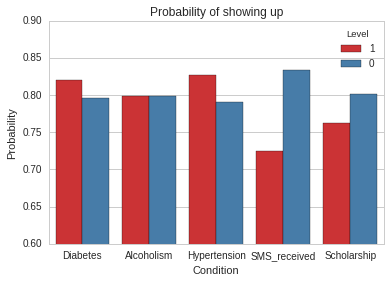

In [26]:
def probStatusCategorical(group_by):
    rows = []
    for item in group_by:
        for level in df[item].unique():
            row = {'Condition': item}
            total = len(df[df[item] == level])
            n = len(df[(df[item] == level) & (df.NoShow == 'No')])
            row.update({'Level': level, 'ShowupProbability': n / float(total)})
            rows.append(row)
    return pd.DataFrame(rows)


sns.barplot(data = probStatusCategorical(['Diabetes', 'Alcoholism', 'Hypertension',
                                         'SMS_received',  'Scholarship']),
            x = 'Condition', y = 'ShowupProbability', hue = 'Level', palette = 'Set1')
#sns.plt.xlim(-1, 6)
sns.plt.ylim(0.6, 0.9)
sns.plt.title('Probability of showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

Except alcoholism, other categorical variables seem more or less influence the showup probability

#### Appointments for each patient 

Mean number of appointments per patient :	1.77415005297


<function matplotlib.pyplot.show>

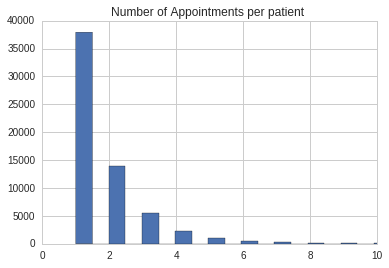

In [29]:
y = df.groupby('PatientID')['AppointmentID'].nunique()
print('Mean number of appointments per patient :\t%s' %np.mean(y))

plt.figure(1)

plt.hist(y, bins = y.nunique()*4)
plt.title("Number of Appointments per patient ")
plt.xlim(0,10)
plt.show


Most patient has only one appointment

In [30]:
df.groupby('PatientID').filter(lambda x: len(x) > 1).count()

PatientID            72607
AppointmentID        72607
Gender               72607
ScheduledDay         72607
AppointmentDay       72607
Age                  72607
Neighbourhood        72607
Scholarship          72607
Hypertension         72607
Diabetes             72607
Alcoholism           72607
Handicap             72607
SMS_received         72607
NoShow               72607
Time                 72607
weekday              72607
month                72607
Neighbourhood_num    72607
dtype: int64

In [31]:
#print df_multiApp.shape
#df.shape

In [32]:
df['NoShowDummy'] = df['NoShow'].astype("category").cat.codes

df['preAppNoShow'] = df.groupby('PatientID')['NoShowDummy'].apply(lambda x: x.shift(1))


In [33]:
df['missedPreAppNum'] = df[df.preAppNoShow.notnull()].groupby('PatientID')['preAppNoShow'].apply(lambda x: x.cumsum())
df['AllPreAppNum'] = df[df.preAppNoShow.notnull()].groupby('PatientID')['preAppNoShow'].apply(lambda x: (x-x+1).cumsum())

In [34]:
df['missedPreAppRatio'] = df['missedPreAppNum']/df['AllPreAppNum']

In [35]:
df.missedPreAppRatio.notnull().sum()

48228

In [36]:
df.shape

(110526, 23)

In [37]:
df.missedPreAppNum = df.missedPreAppNum.fillna(-5)

In [38]:
df.missedPreAppRatio = df.missedPreAppRatio.fillna(-1)


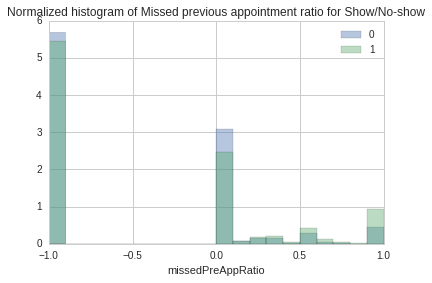

In [39]:
tmp  = df[df.missedPreAppRatio.notnull()].groupby(['NoShowDummy'])
for name, group in tmp:
    #print name
    #print group.info()
    sns.distplot(group['missedPreAppRatio'], kde=False, norm_hist = True, label= str(name),bins= 20) 
    plt.xlim(-1,1)
                 
plt.legend()
plt.title("Normalized histogram of Missed previous appointment ratio for Show/No-show")

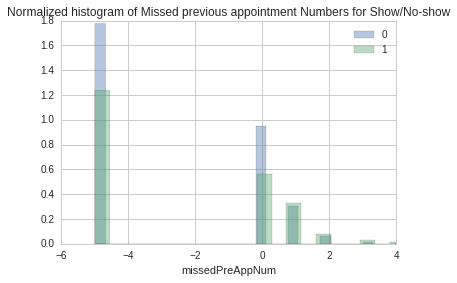

In [40]:
tmp  = df.groupby(['NoShowDummy'])
for name, group in tmp:
    #print name
    #print group.info()
    #print group
    sns.distplot(group['missedPreAppNum'], kde=False, norm_hist = True, label= str(name)) 
    #sns.countplot(group['missedPreAppNum'], label= str(name)) 

plt.xlim(-6,4)
#sns.countplot(x='missedPreAppNum', hue='NoShow',data=df)                  
plt.legend()
plt.title("Normalized histogram of Missed previous appointment Numbers for Show/No-show")


g = sns.FacetGrid(df, hue='NoShow')
g = g.map(sns.distplot,'missedPreAppNum',  kde=False, norm_hist = True).set(xlim=(-5,5))

In [41]:
#df.shape

In [42]:
#patient = pd.DataFrame(y, column=['PatientID', 'AppNum'])

In [43]:
#g = sns.FacetGrid(df_rtn, hue="group")
#g = g.map(sns.distplot, "variable")

#g = sns.FacetGrid(df, hue='NoShow')
#g = g.map(sns.distplot,'appPreviousMissedRatio',  kde=False, norm_hist = True)

In [44]:
#sns.distplot(df['appPreviousMissedRatio'], hue='NoShow', kde=False, norm_hist = True)

In [45]:
# Create dummy variables for categorical variables
# One-hot Encoding: dp.get_dummies()

def dummies(df, columns = []):

    for column in columns:
        df[column] = df[column].astype('category').cat.codes
        df = pd.concat((df, pd.get_dummies(df[column], prefix = column)), axis = 1)
        del df[column]
    return df

In [46]:
#pd.DataFrame.hist(df['Time'])
#sns.distplot(df['Time'], kde=False)
#column='Gender'
#df[column] = df[column].astype("category").cat.codes
#tmp = pd.Categorical(df['Gender'])
#tmp.cat.codes

In [47]:
df = dummies(df, columns=['Gender', 'Neighbourhood', 'Scholarship', 'Hypertension', 
                          'Diabetes','Alcoholism', 'Handicap', 'SMS_received', 'month','weekday'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 954 to 87223
Columns: 120 entries, PatientID to weekday_5
dtypes: datetime64[ns](2), float64(5), int64(3), int8(2), object(1), uint8(107)
memory usage: 21.6+ MB


df.columns.values

In [50]:
df['pre_appMissed'] = df.groupby('PatientID')['NoShowDummy'].apply(lambda x: x.shift(1)==1)


In [52]:
df.pre_appMissed.unique()

array([False, True], dtype=object)

In [53]:
df.pre_appMissed.value_counts()

False    100489
True      10037
Name: pre_appMissed, dtype: int64

In [55]:
pd.crosstab(df['pre_appMissed'], df['NoShowDummy'])

NoShowDummy,0,1
pre_appMissed,,
False,81624,18865
True,6583,3454


Mean number of appointments per patient:	1.63419371408
Median number of appointments per patient:	1.0


<function matplotlib.pyplot.show>

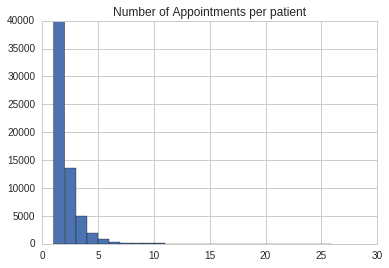

In [57]:
# Histogram of number of appointments per patient
x = df.groupby('PatientID')['AppointmentDay'].nunique()
print('Mean number of appointments per patient:\t%s' %np.mean(x))
print('Median number of appointments per patient:\t%s' %np.median(x))

plt.figure(1)
plt.hist(x, bins = x.nunique())
plt.title("Number of Appointments per patient")
plt.show

In [58]:
x = df.groupby('PatientID')['AppointmentDay']

In [60]:
# Print basic information
print("Number of listed PatientID:\t%s" %df.shape[0])
print("Number of unique PatientId:\t%s" %len(df.PatientID.unique()))
print("Number of unique AppointmentID:\t%s" %len(df.AppointmentID.unique()))


Number of listed PatientID:	110526
Number of unique PatientId:	62298
Number of unique AppointmentID:	110526


In [61]:
data = df.groupby(['PatientID','AppointmentDay'])['AppointmentID']
df['n_appSameDaySamePatient'] = data.transform(lambda x: x.nunique())

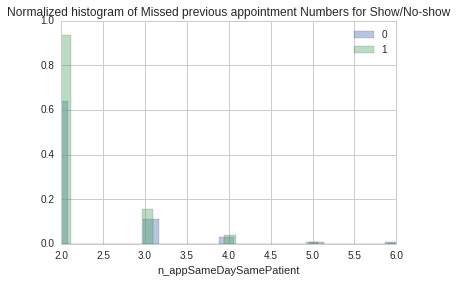

In [69]:
tmp  = df.groupby(['NoShowDummy'])
for name, group in tmp:
    #print name
    #print group.info()
    #print group
    sns.distplot(group['n_appSameDaySamePatient'], kde=False, norm_hist = True, label= str(name)) 
    #sns.countplot(group['missedPreAppNum'], label= str(name)) 

plt.xlim(2,6)
plt.ylim(0,1)
#sns.countplot(x='missedPreAppNum', hue='NoShow',data=df)                  
plt.legend()
plt.title("Normalized histogram of Missed previous appointment Numbers for Show/No-show")

sns.lmplot(data = probStatus1(df, 'n_appSameDaySamePatient', 'NoShowDummy'), 
           x = 'n_appSameDaySamePatient', y = 'probShowUp', hue='NoShowDummy', fit_reg = False, scatter_kws={'s':60})

sns.plt.xlim(0, 100)
sns.plt.ylim(0.65, 1.05)
sns.plt.title('Probability of showing up with respect to Age')
sns.plt.show()

df.columns.values

In [72]:
del df['NoShow']

### Feature Engineering 

### Modeling

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit


In [73]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
y = df['NoShowDummy']
del df['NoShowDummy']
X = df

In [ ]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
